<a href="https://colab.research.google.com/github/Mngambi/phase3_project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Understanding**

SyriaTel faces a critical issue: customer churn. Subscribers discontinuing service leads to lost revenue and hinders the company's growth. To address this challenge, a customer churn prediction model is proposed. This model will analyze customer data to identify those at high risk of churning. By proactively recognizing these at-risk customers, SyriaTel can implement targeted retention strategies like personalized discounts or plan recommendations. This approach aims to not only reduce churn but also improve customer lifetime value, generate increased revenue, and ultimately enhance overall customer satisfaction.

In [1]:
#import the relevant library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# Define the DataFrame in the global scope
df = pd.DataFrame()

#create a function that loads data and gets the info about the data.
def load_and_get_info(file_path):
    """
    Load data from a CSV file and get information about the DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.

    Returns:
    - df_info (str): Information about the DataFrame.
    """
    # Load data
    global df
    df = pd.read_csv(file_path)

    # Display the first few rows of the DataFrame
    df_head = df.head()

    # Get information about the DataFrame
    df_info = df.info()

    return df_info, df_head


In [2]:
file_path = '/content/syriatel.csv'
df_info, df_head = load_and_get_info(file_path)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Dataset contains 3333 rows and 21 columns

In [3]:
def check_dtypes(df):
    """
    Check data types and identify the kind of variable for each column in the DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - dtypes_info (DataFrame): DataFrame containing information about data types and variable types.
    """
    # Get data types of each column
    dtypes = df.dtypes

    variable_types = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            variable_types.append('Numeric')
        else:
            variable_types.append('Categorical')

    # Create DataFrame to store information
    dtypes_info = pd.DataFrame({'Column': dtypes.index, 'Data Type': dtypes.values, 'Variable Type': variable_types})

    return dtypes_info

data_types_info = check_dtypes(df)
print(data_types_info)

                    Column Data Type Variable Type
0                    state    object   Categorical
1           account length     int64       Numeric
2                area code     int64       Numeric
3             phone number    object   Categorical
4       international plan    object   Categorical
5          voice mail plan    object   Categorical
6    number vmail messages     int64       Numeric
7        total day minutes   float64       Numeric
8          total day calls     int64       Numeric
9         total day charge   float64       Numeric
10       total eve minutes   float64       Numeric
11         total eve calls     int64       Numeric
12        total eve charge   float64       Numeric
13     total night minutes   float64       Numeric
14       total night calls     int64       Numeric
15      total night charge   float64       Numeric
16      total intl minutes   float64       Numeric
17        total intl calls     int64       Numeric
18       total intl charge   fl

4 categorical values: state, phone number, international plan and voice mail plan
the rest are numerical values



In [4]:
def check_null_and_duplicates(df):
    """
    Check for both null values and duplicated rows in a DataFrame.

    Parameters:
    - df: DataFrame
        The DataFrame to check.

    Returns:
    - info_df: DataFrame
        DataFrame containing information about null values and duplicated rows.
    """
    # Check for null values
    null_values = df.isnull().sum()
    if null_values.sum() > 0:
        print("Null Values:")
        print(null_values)
    else:
        print("No Null Values Found.")
    duplicated_rows = df.duplicated().sum()
    if duplicated_rows > 0:
        print("\nDuplicated Rows Found:", duplicated_rows)
        duplicated_df = df[df.duplicated()]
        print(duplicated_df)
    else:
        print("\nNo Duplicated Rows Found.")
        duplicated_df = pd.DataFrame()  # Empty DataFrame if no duplicates

    # Create a DataFrame to store information
    info_df = pd.DataFrame({
        'Column': null_values.index,
        'Null Count': null_values.values,
        'Duplicated Rows': duplicated_rows
    })
    return info_df
info_df= check_null_and_duplicates(df)
print (info_df)

No Null Values Found.

No Duplicated Rows Found.
                    Column  Null Count  Duplicated Rows
0                    state           0                0
1           account length           0                0
2                area code           0                0
3             phone number           0                0
4       international plan           0                0
5          voice mail plan           0                0
6    number vmail messages           0                0
7        total day minutes           0                0
8          total day calls           0                0
9         total day charge           0                0
10       total eve minutes           0                0
11         total eve calls           0                0
12        total eve charge           0                0
13     total night minutes           0                0
14       total night calls           0                0
15      total night charge           0                0


Column Name: account length
count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64


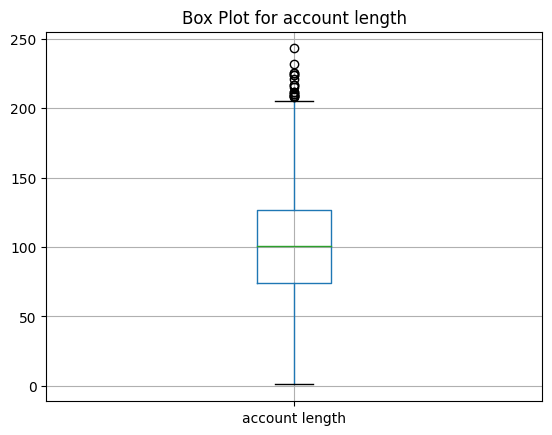


Column Name: area code
count    3333.000000
mean      437.182418
std        42.371290
min       408.000000
25%       408.000000
50%       415.000000
75%       510.000000
max       510.000000
Name: area code, dtype: float64


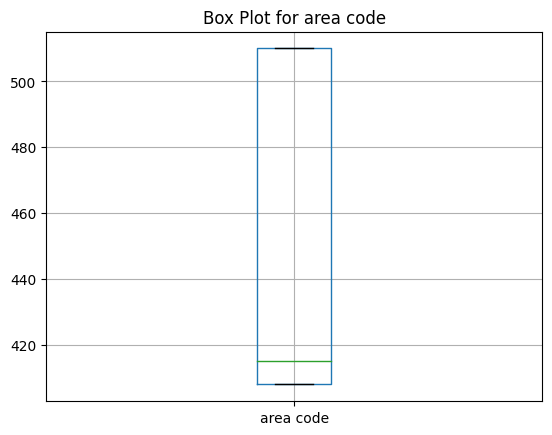


Column Name: number vmail messages
count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number vmail messages, dtype: float64


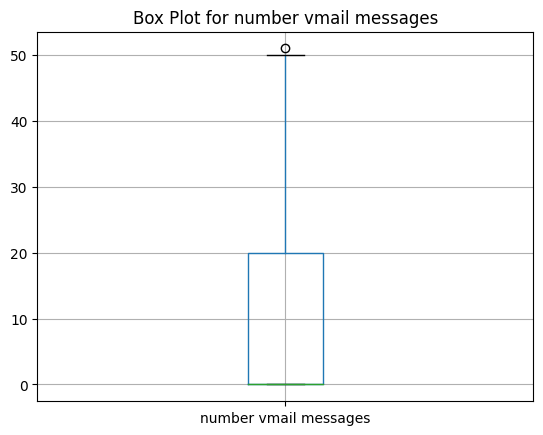


Column Name: total day minutes
count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64


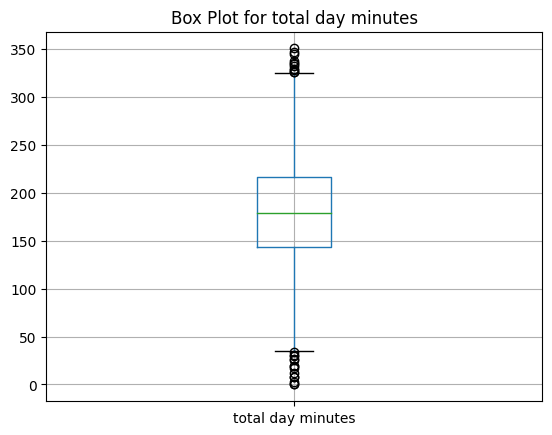


Column Name: total day calls
count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64


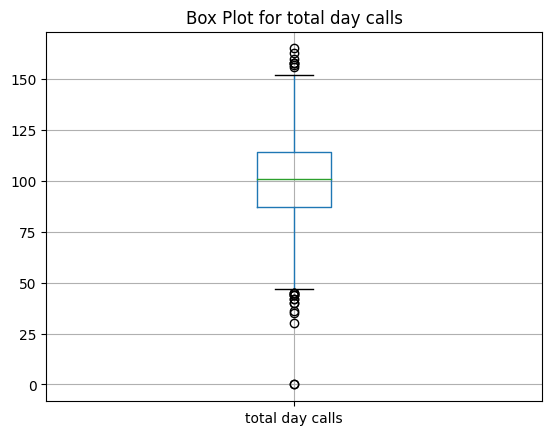


Column Name: total day charge
count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64


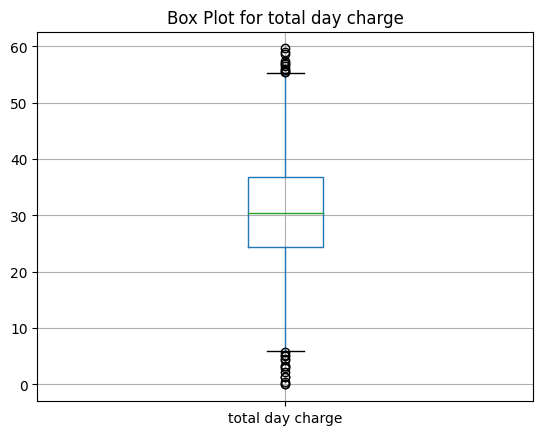


Column Name: total eve minutes
count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: total eve minutes, dtype: float64


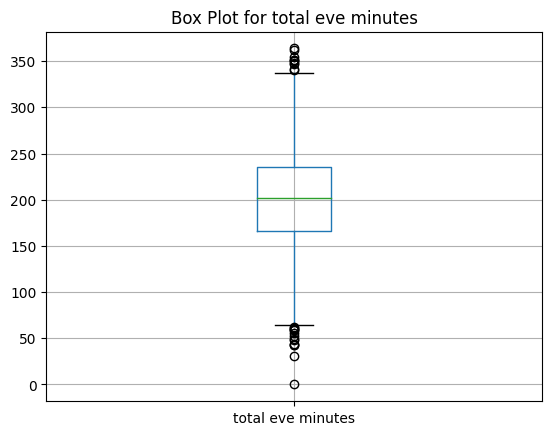


Column Name: total eve calls
count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total eve calls, dtype: float64


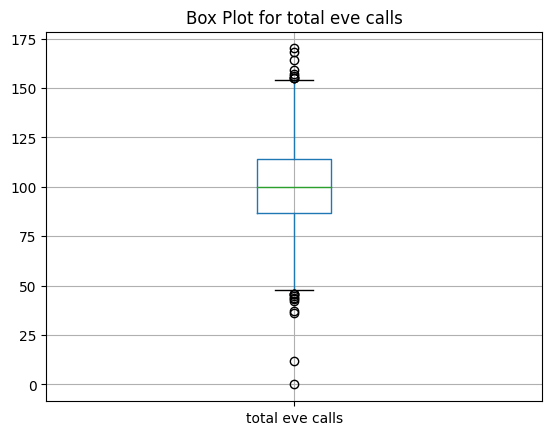


Column Name: total eve charge
count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: total eve charge, dtype: float64


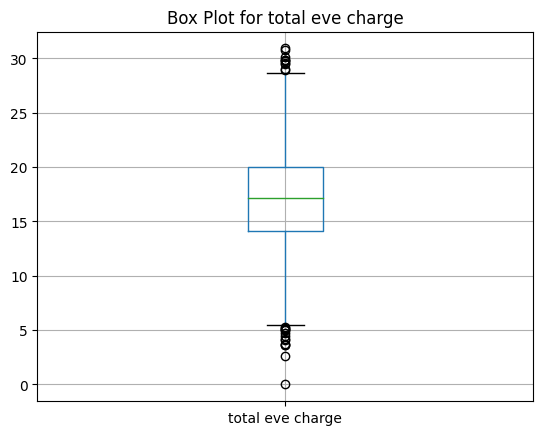


Column Name: total night minutes
count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: total night minutes, dtype: float64


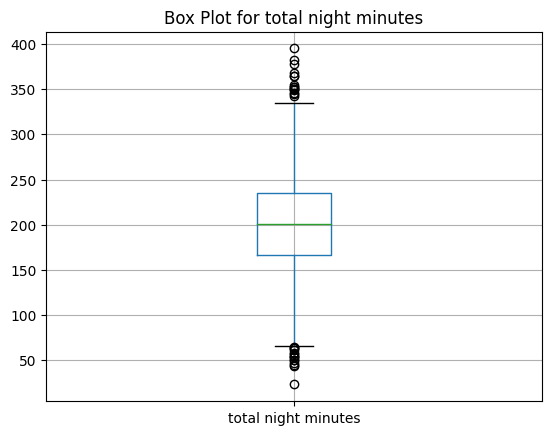


Column Name: total night calls
count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total night calls, dtype: float64


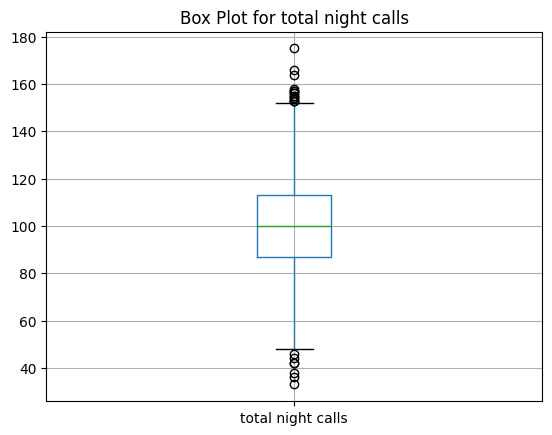


Column Name: total night charge
count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: total night charge, dtype: float64


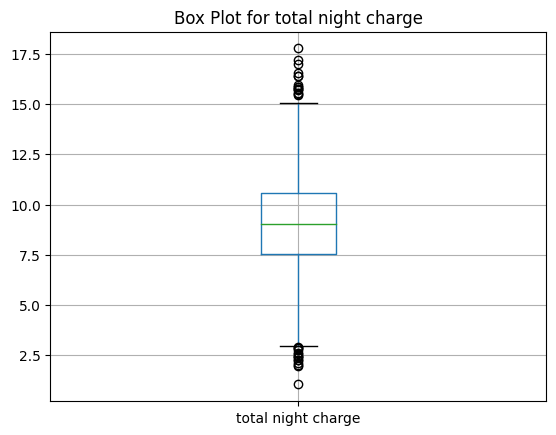


Column Name: total intl minutes
count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: total intl minutes, dtype: float64


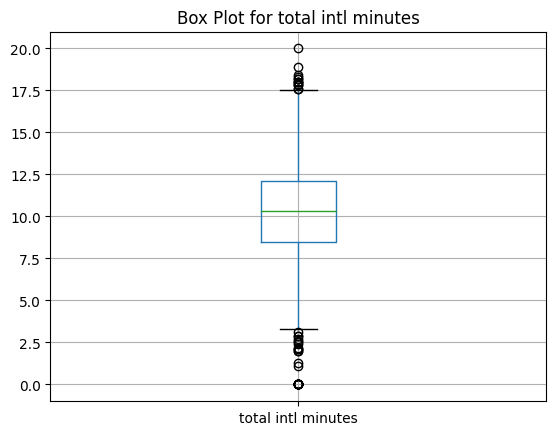


Column Name: total intl calls
count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total intl calls, dtype: float64


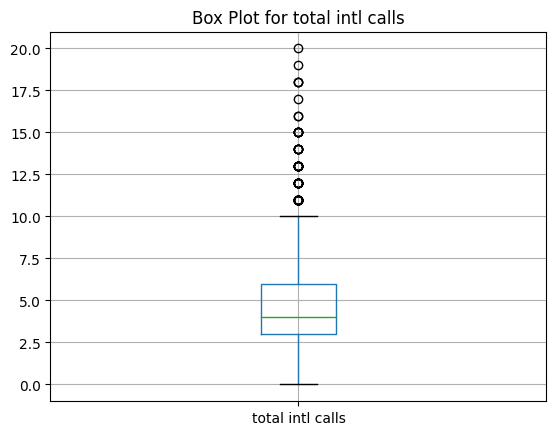


Column Name: total intl charge
count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: total intl charge, dtype: float64


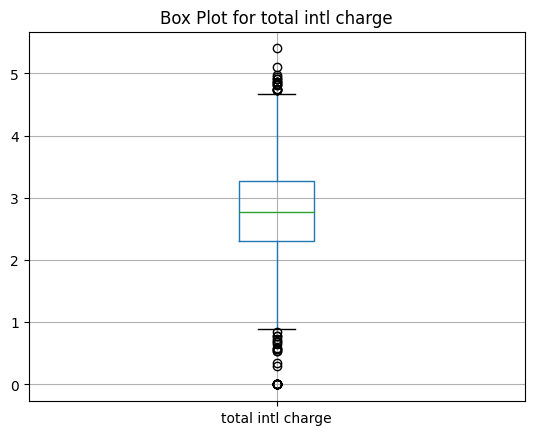


Column Name: customer service calls
count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64


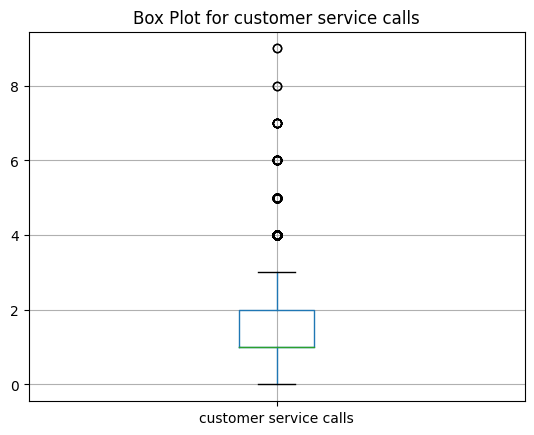

In [5]:
#checking outliers

def check_outliers_all(filename, z_thresh=3, iqr_thresh=1.5):
  """
  This function checks for outliers in all numeric columns of a pandas dataframe loaded from a file, using Z-scores, IQR, and box plots.

  Args:
      filename (str): The path to the CSV file containing the data.
      z_thresh (float, optional): Threshold for Z-scores (default 3). Defaults to 3.
      iqr_thresh (float, optional): Threshold multiplier for IQR (default 1.5). Defaults to 1.5.

  Returns:
      pandas.DataFrame: A dictionary containing information about outliers for each column.
  """
  # Read data from CSV
  df = pd.read_csv(file_path)

  # Select numeric columns
  numeric_cols = df.select_dtypes(include=['int64', 'float64'])

  # Dictionary to store outlier information
  outlier_info = {}

  # Loop through columns
  for col in numeric_cols:
    # Descriptive statistics
    print(f"\nColumn Name: {col}")
    print(df[col].describe())

    # Box plot
    df.boxplot(column=col)
    plt.title(f"Box Plot for {col}")
    plt.show()

    # Z-score method
    df['z_score'] = (df[col] - df[col].mean()) / df[col].std()
    outliers_zscore = df[(df['z_score'] < -z_thresh) | (df['z_score'] > z_thresh)][col]

    # IQR method
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr_thresh * iqr)
    upper_bound = q3 + (iqr_thresh * iqr)
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    # Combine outliers
    outliers = pd.concat([outliers_zscore, outliers_iqr]).drop_duplicates()

    # Store outlier information for this column
    outlier_info[col] = {'Z-score outliers': outliers_zscore, 'IQR outliers': outliers_iqr}

    # Clear temporary column
    del df['z_score']

  return outlier_info


outlier_info = check_outliers_all(file_path)


In [6]:
import pandas as pd

def remove_outliers(df, outlier_info):
  """
  This function removes outliers from a dataframe based on the information provided by the check_outliers_all function.

  Args:
      df (pandas.DataFrame): The dataframe containing the data.
      outlier_info (dict): The dictionary containing outlier information for each column, generated by the check_outliers_all function.

  Returns:
      pandas.DataFrame: A new dataframe with outliers removed.
  """
  # Loop through columns
  for col, outliers in outlier_info.items():
    # Combine outliers from Z-score and IQR
    all_outliers = pd.concat([outliers['Z-score outliers'], outliers['IQR outliers']])

    # Remove outliers using try-except for potential index errors
    try:
      df.drop(all_outliers, inplace=True)
    except KeyError:
      pass  # Do nothing if index error occurs

  return df

# Example usage (assumes outlier_info is available from Cell 1)
df_without_outliers = remove_outliers(df.copy(), outlier_info)
print(df_without_outliers)


     state  account length  area code phone number international plan  \
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
10      IN              65        415     329-6603                 no   
21      CO              77        408     393-7984                 no   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
1                yes                     26              

In [7]:
df.shape

(3333, 21)

In [8]:
df_without_outliers.shape


(3290, 21)

In [9]:
df_without_outliers.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
df = df_without_outliers

In [11]:
df.shape

(3290, 21)

after checking duplicate and null values and outliers, we can refer to it as df to simplify variables  
As seen, the shape of the dataset changes

In [12]:
df


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


data analysis?



univariate analysis

In [26]:
#function to perform all relevant univariate analysis

def describe_column(df, column_name):
  """
  This function calculates and returns descriptive statistics for a DataFrame column.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column.
      column_name (str): The name of the column to analyze.

  Returns:
      dict: A dictionary containing the mean, mode, variance, and standard deviation of the column.
  """

  # Check if column exists
  if column_name not in df.columns:
    raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

  # Get the column
  column = df[column_name]

  # Calculate statistics
  results = {
      "mean": column.mean(),
      "mode": column.mode().iloc[0] if len(column.mode()) > 0 else None,  # Handle case with no mode
      "range": (column.min(), column.max()),
      "variance": column.var(),
      "standard_deviation": column.std()

  }

  return results

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3290 entries, 1 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3290 non-null   object 
 1   account length          3290 non-null   int64  
 2   area code               3290 non-null   int64  
 3   phone number            3290 non-null   object 
 4   international plan      3290 non-null   object 
 5   voice mail plan         3290 non-null   object 
 6   number vmail messages   3290 non-null   int64  
 7   total day minutes       3290 non-null   float64
 8   total day calls         3290 non-null   int64  
 9   total day charge        3290 non-null   float64
 10  total eve minutes       3290 non-null   float64
 11  total eve calls         3290 non-null   int64  
 12  total eve charge        3290 non-null   float64
 13  total night minutes     3290 non-null   float64
 14  total night calls       3290 non-null   int64

In [35]:
statistics_vmail = describe_column(df, 'number vmail messages')
print(statistics_vmail)

print("day statistics")
statistics_day_mins = describe_column(df, 'total day minutes')
print("day minutes:" ,statistics_day_mins)

statistics_day_calls = describe_column(df, 'total day calls')
print("day calls:" ,statistics_day_calls)

statistics_day_charge = describe_column(df, 'total day charge')
print("day charge:" ,statistics_day_charge)

print("eve statistics")
statistics_eve_mins = describe_column(df, 'total eve minutes')
print("eve minutes:" ,statistics_eve_mins)

statistics_eve_calls = describe_column(df, 'total eve calls')
print("eve calls:" ,statistics_eve_calls)

statistics_eve_charge = describe_column(df, 'total eve charge')
print("eve charge:" ,statistics_eve_charge)

print("night statistics")
statistics_night_mins = describe_column(df, 'total night minutes')
print("night minutes:" ,statistics_night_mins)

statistics_night_calls = describe_column(df, 'total night calls')
print("night calls:" ,statistics_night_calls)

statistics_night_charge = describe_column(df, 'total night charge')
print("night charge:" ,statistics_night_charge)

print("international statistics")
statistics_intl_mins = describe_column(df, 'total intl minutes')
print("intl minutes" ,statistics_intl_mins)

statistics_intl_calls = describe_column(df, 'total intl calls')
print("intl calls:" ,statistics_night_calls)

statistics_intl_charge = describe_column(df, 'total intl charge')
print("intl charge:" ,statistics_intl_charge)

{'mean': 8.100607902735563, 'mode': 0, 'range': (0, 51), 'variance': 187.57607138467458, 'standard_deviation': 13.695841390169301}
day statistics
day minutes: {'mean': 179.7044984802432, 'mode': 159.5, 'range': (0.0, 350.8), 'variance': 2964.092925941774, 'standard_deviation': 54.44348377851819}
day calls: {'mean': 100.47203647416413, 'mode': 102, 'range': (0, 165), 'variance': 402.9899444681128, 'standard_deviation': 20.074609447461558}
day charge: {'mean': 30.550310030395135, 'mode': 27.12, 'range': (0.0, 59.64), 'variance': 85.66191829850077, 'standard_deviation': 9.25537240193504}
eve statistics
eve minutes: {'mean': 200.82483282674775, 'mode': 169.9, 'range': (0.0, 363.7), 'variance': 2560.1558471140333, 'standard_deviation': 50.59798263877754}
eve calls: {'mean': 100.17993920972644, 'mode': 105, 'range': (0, 170), 'variance': 397.38202371171843, 'standard_deviation': 19.93444315027933}
eve charge: {'mean': 17.070316109422492, 'mode': 14.25, 'range': (0.0, 30.91), 'variance': 18.4